In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('F:\DATA SCIENCE\Projects\Adult Census project\Dataset\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### heatmap for the numeric features

<Axes: >

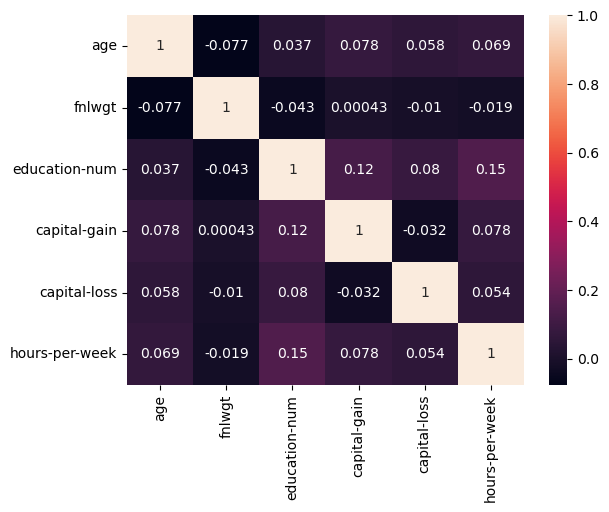

In [3]:
sns.heatmap(df.corr(),annot=True)

## Exploratory Data Analysis


#### Analysing the feature 'age'

In [4]:
print(df['age'].unique())
print('Count of unique ages in the dataset',df['age'].nunique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Count of unique ages in the dataset 73


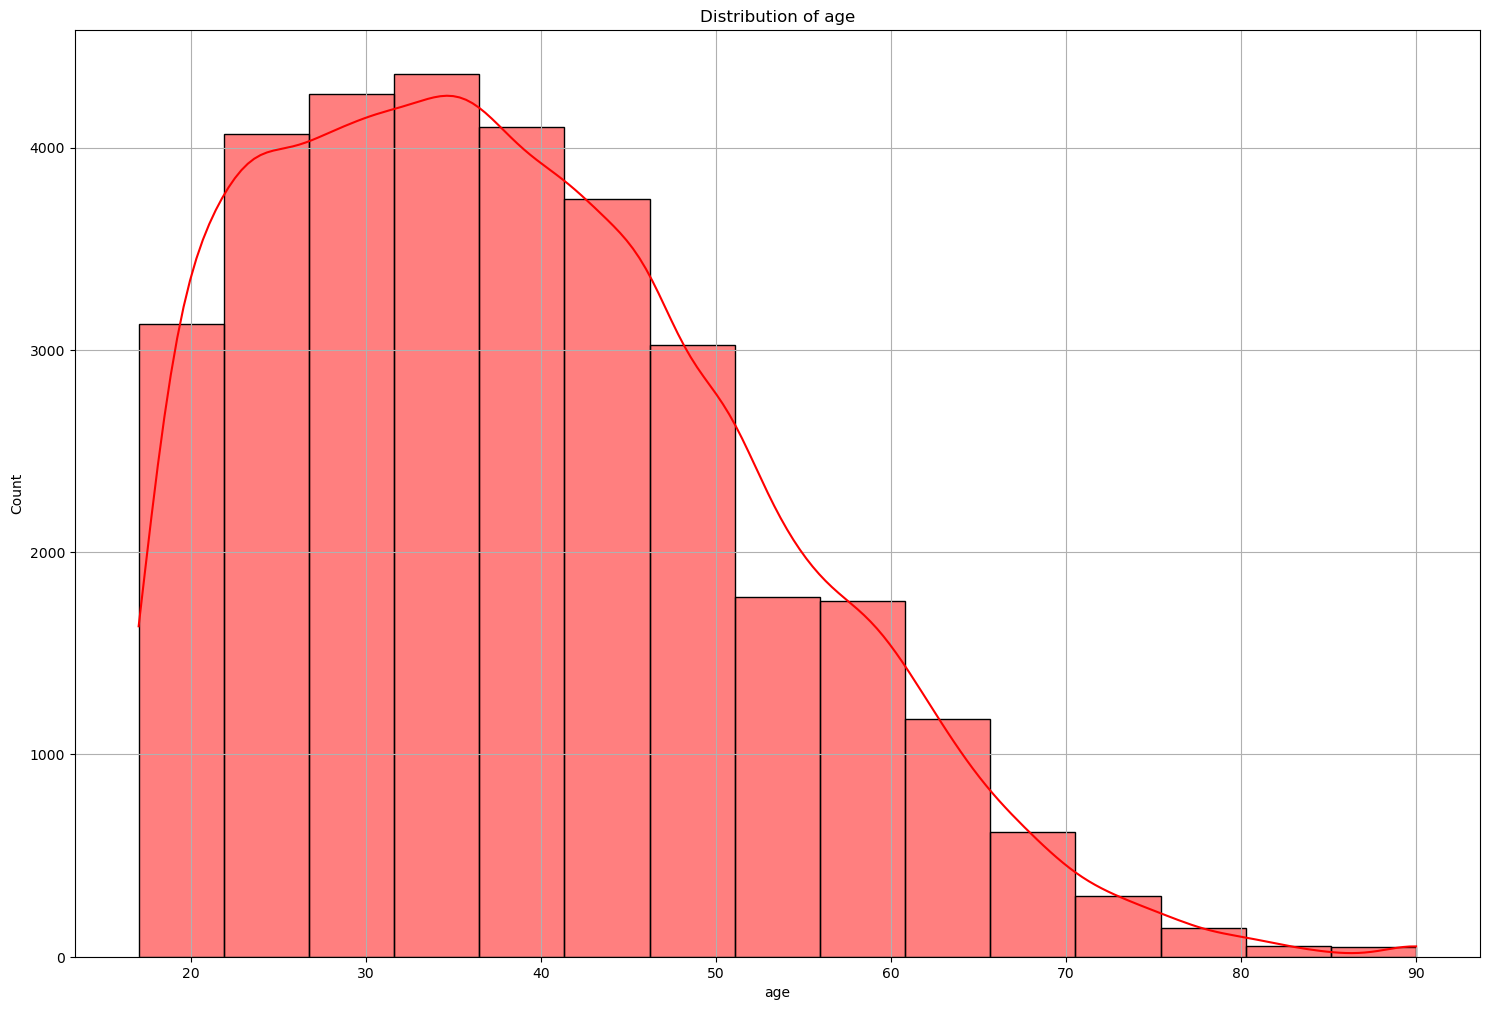

In [5]:
plt.figure(figsize=(15,10))
sns.histplot(df['age'],color='red',bins=15,stat='count',kde=True)
plt.tight_layout()
plt.title('Distribution of age')
plt.grid(True)
plt.show()

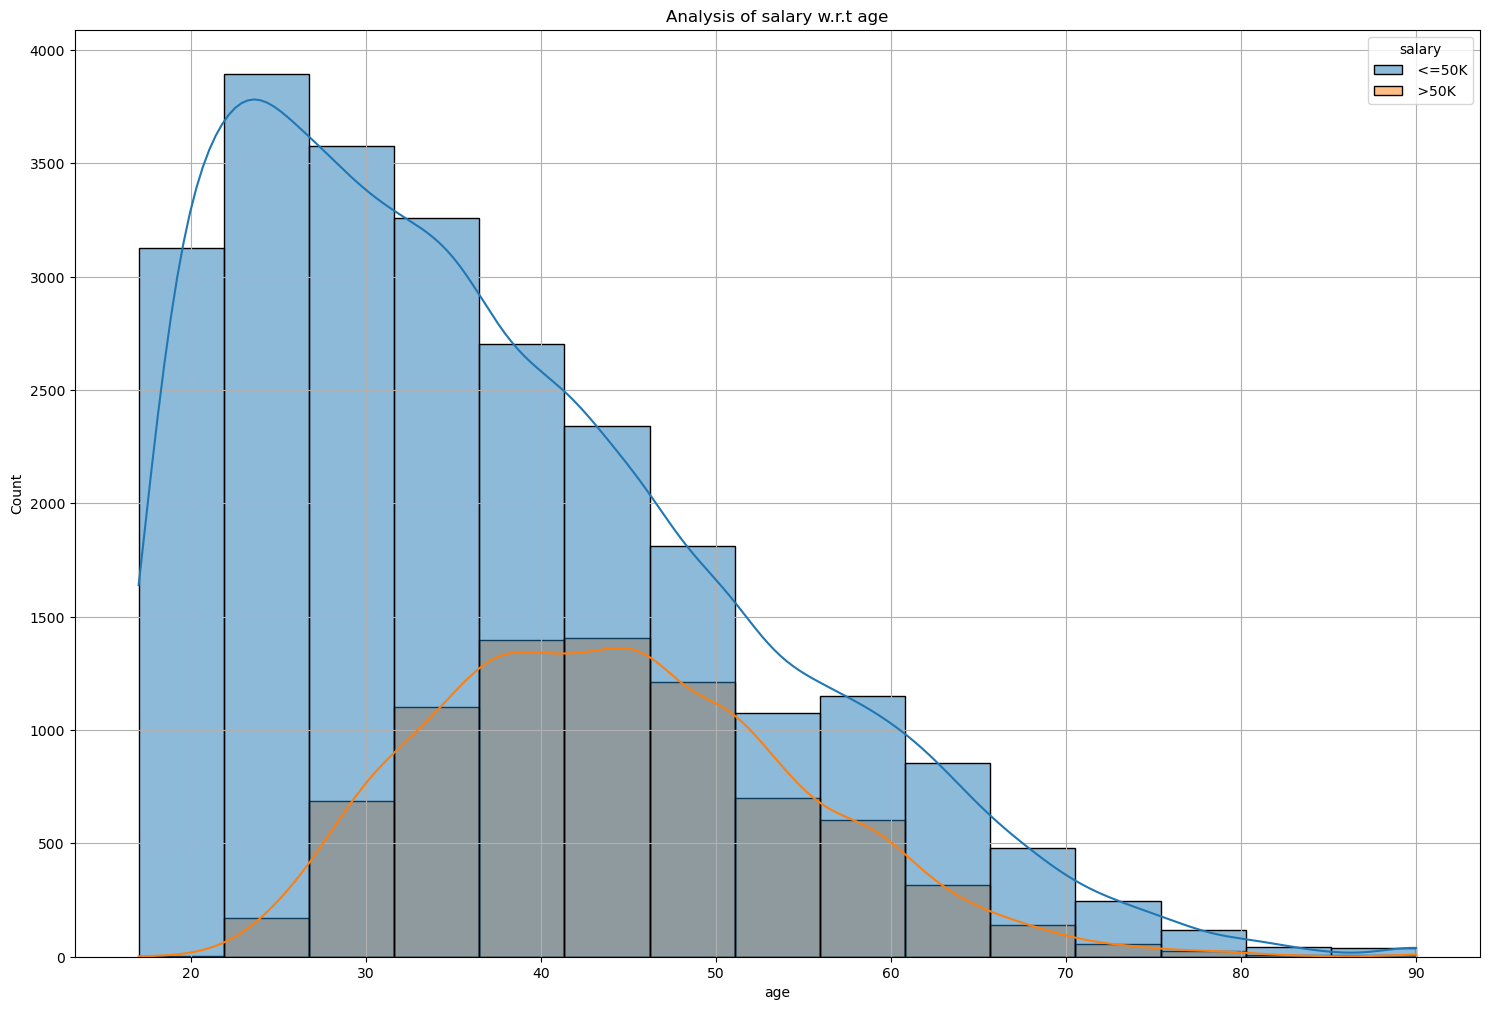

In [6]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['age'],hue=df['salary'],kde=True,color='blue',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Analysis of salary w.r.t age')
plt.show()

#### Insights:: 
Observing the age feature we can see that there are no records present for people with age less than 20 years and grater than 90 years. The maximum frequency of data present is between the ages 30 and 40.

Observing the data for salary we can see that maximum records for salary greater than 50K is centered around the age group of around 40 and 50. Also there are no records of salary greater than 50K in the age group less tahn 20 and greater than 80










#### Feature 'Workclass'

In [7]:
print('various workclasses present in the dataset: ',df['workclass'].unique())
print('\n Number of workclasses: ',df['workclass'].nunique())

various workclasses present in the dataset:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 Number of workclasses:  9


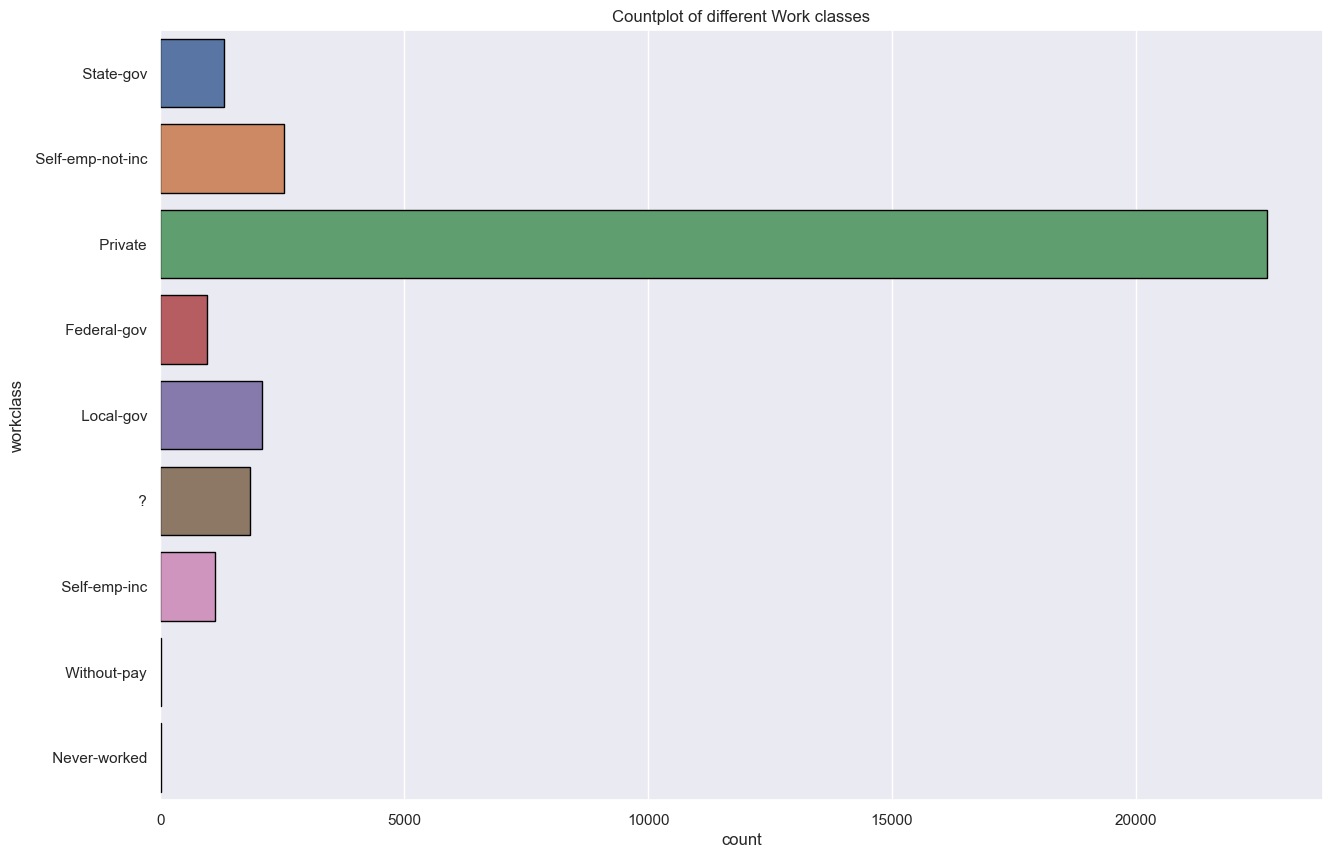

In [8]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.grid(True)
plt.title('Countplot of different Work classes')
sns.countplot(data=df,y='workclass',edgecolor='black')
plt.show()

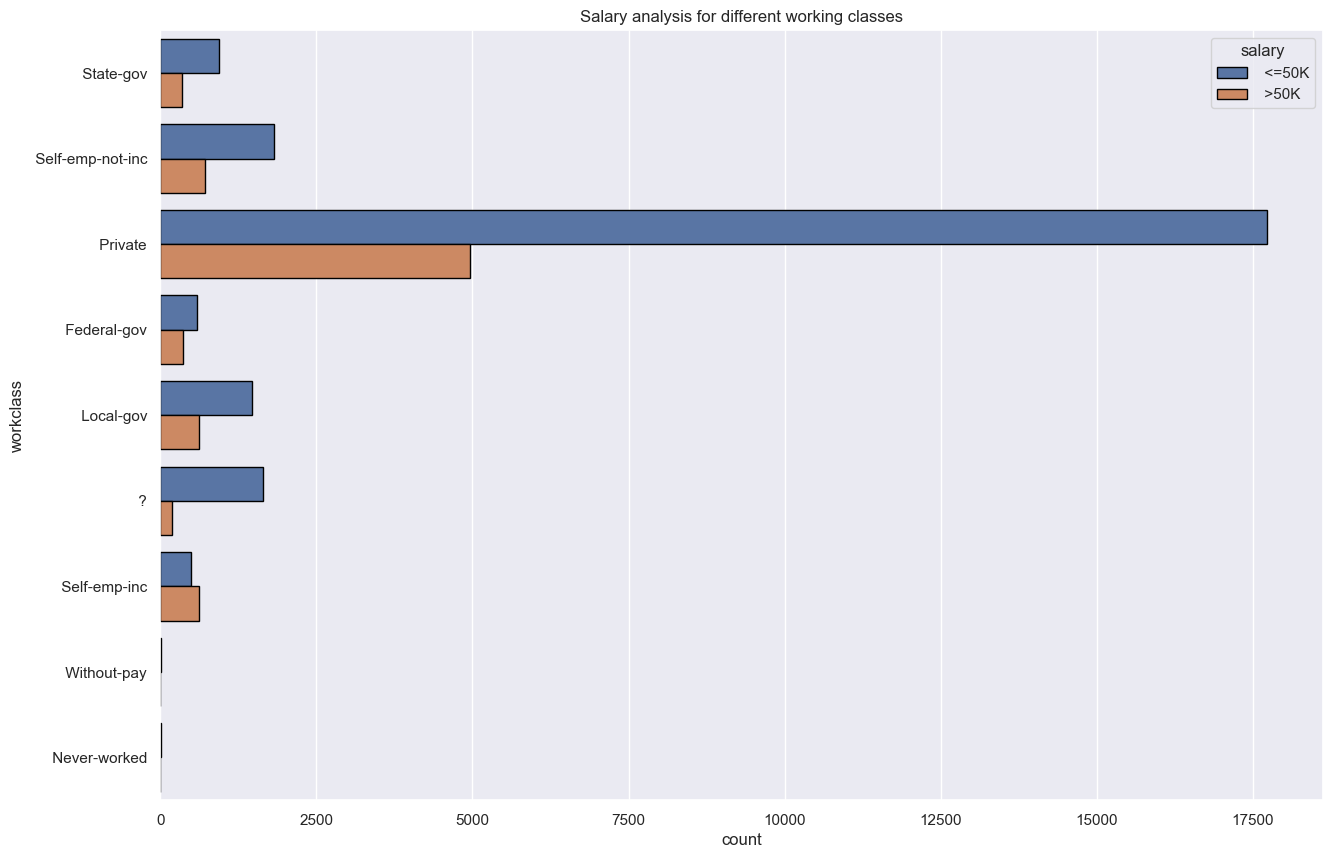

In [9]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
plt.grid(True)
plt.title('Salary analysis for different working classes')
sns.countplot(data=df,y='workclass',hue='salary',edgecolor='black')
plt.show()

### Insights::


There is a category '?' which has to be handled 


Maximum amount of people work in the private sector and has maximum number of people with salaries more than 50K in this working-classs category.





## Feature 'fnlwgt'

fnlwgt is a variable in the US census that stands for final weight, a continuous variable representing the number of units in the target population.

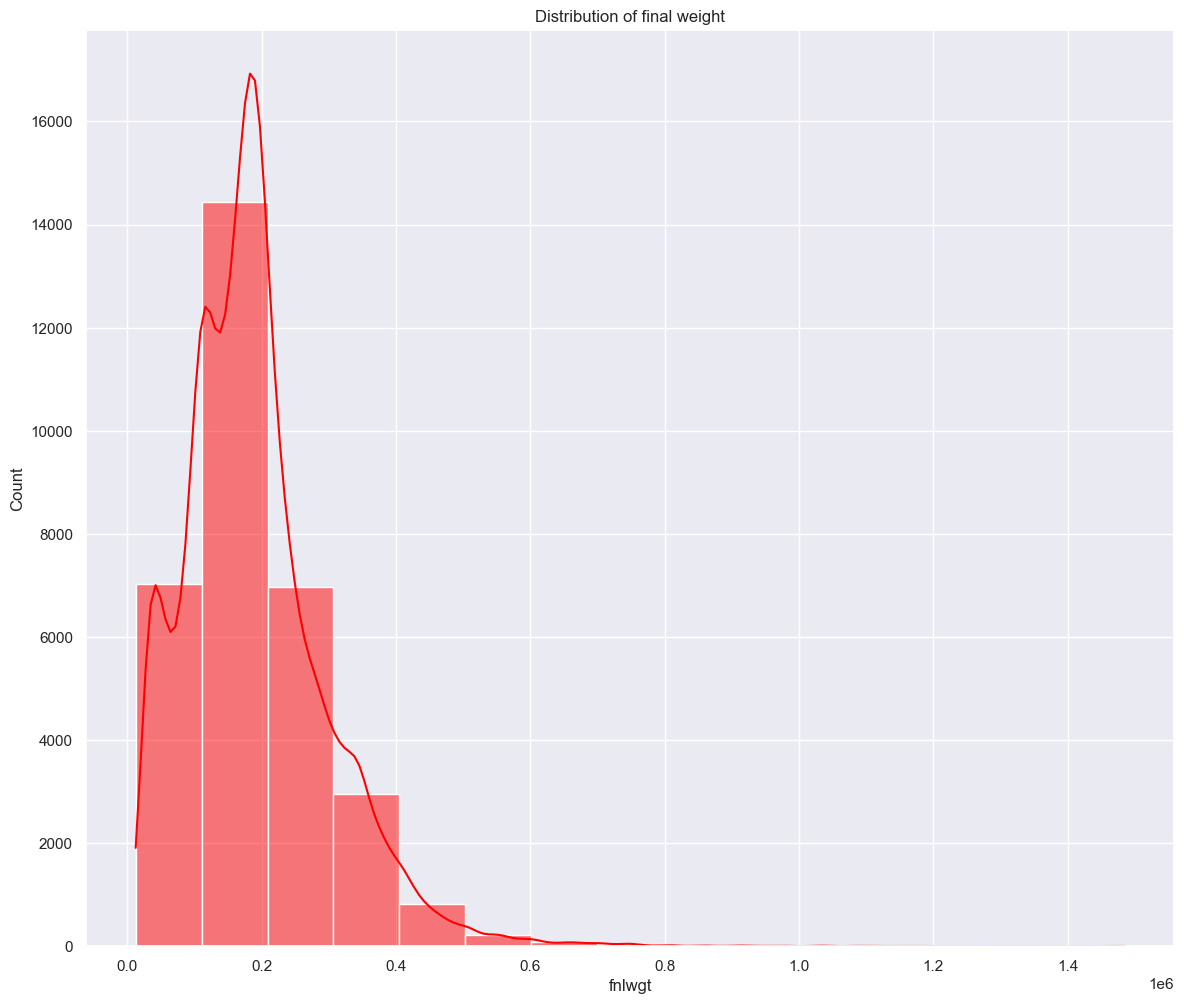

In [10]:
plt.figure(figsize=(12,10))
sns.histplot(df['fnlwgt'],color='red',bins=15,stat='count',kde=True)
plt.tight_layout()
plt.title('Distribution of final weight')
plt.grid(True)
plt.show()

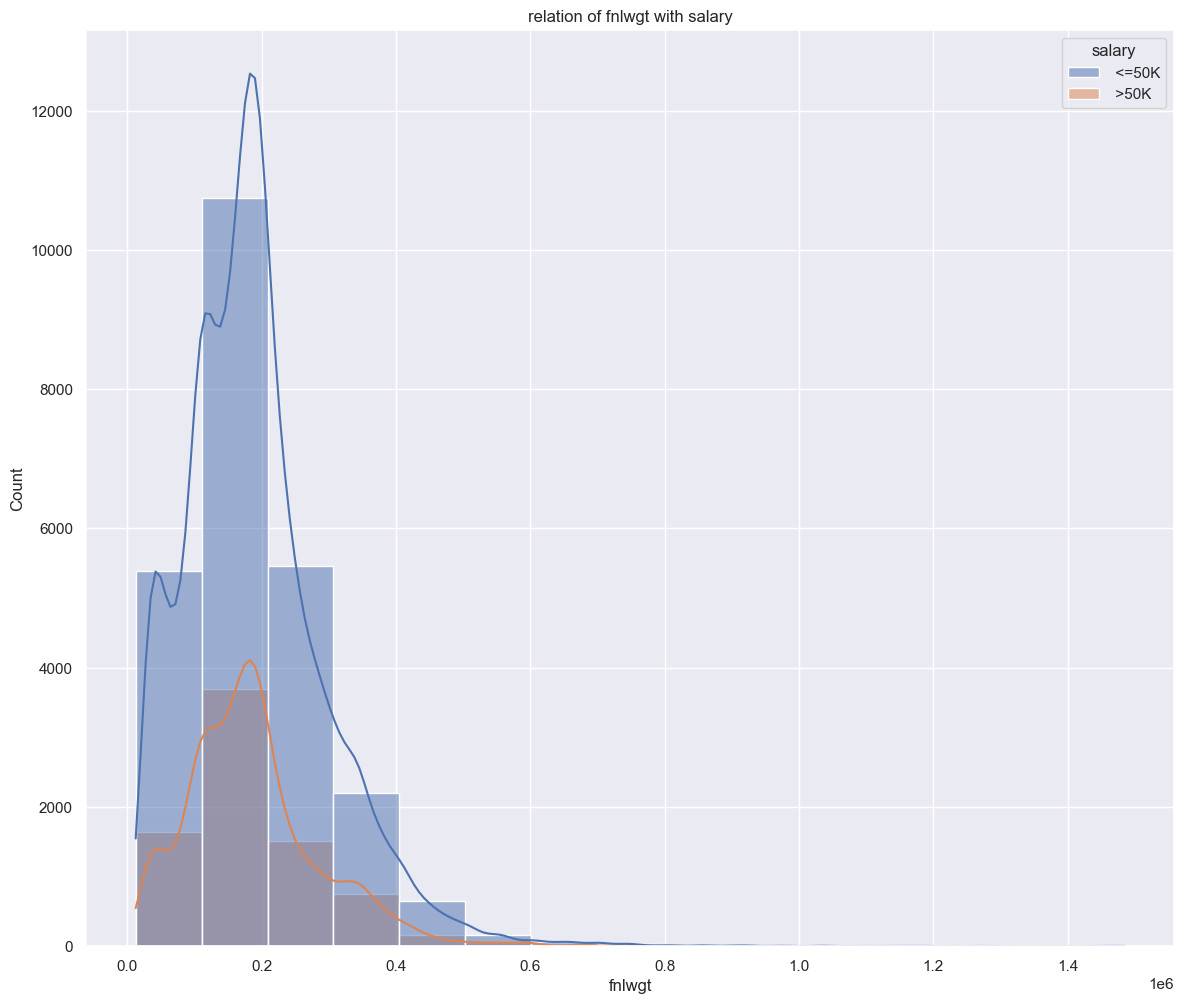

In [11]:
plt.figure(figsize=(12,10))
sns.histplot(x=df['fnlwgt'],color='red',bins=15,hue=df['salary'],kde=True)
plt.tight_layout()
plt.title('relation of fnlwgt with salary')
plt.grid(True)
plt.show()

#### Insights::
No perticular trend observed in the feature , can be dropped from the dataset if wanted.

## Feature 'education'

In [12]:
print('different eduactional qualifications in the dataset : ',df['education'].unique())

different eduactional qualifications in the dataset :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [13]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

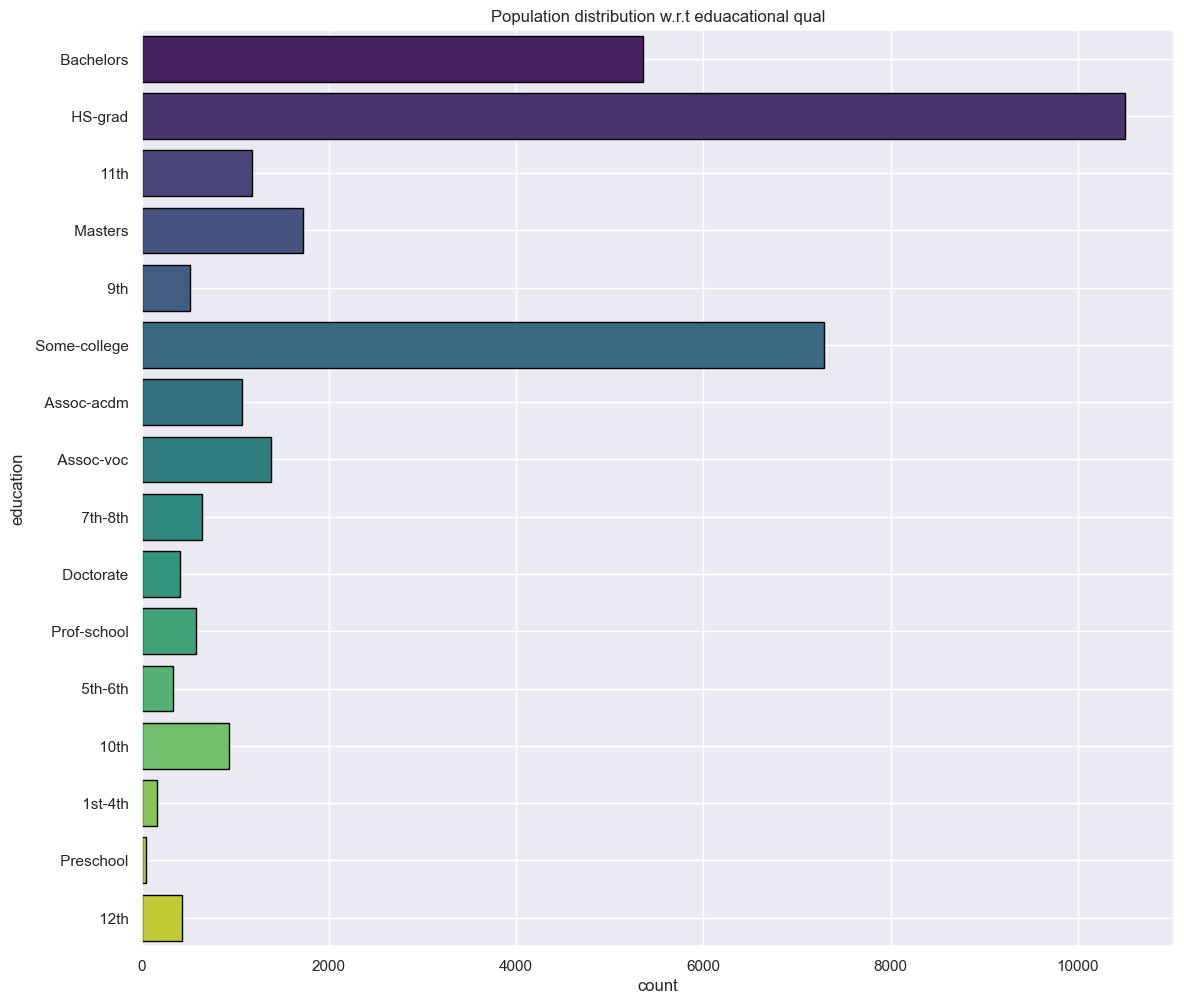

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,y='education',palette='viridis',edgecolor='black')
plt.tight_layout()
plt.title('Population distribution w.r.t eduacational qual')
plt.grid(True)
plt.show()

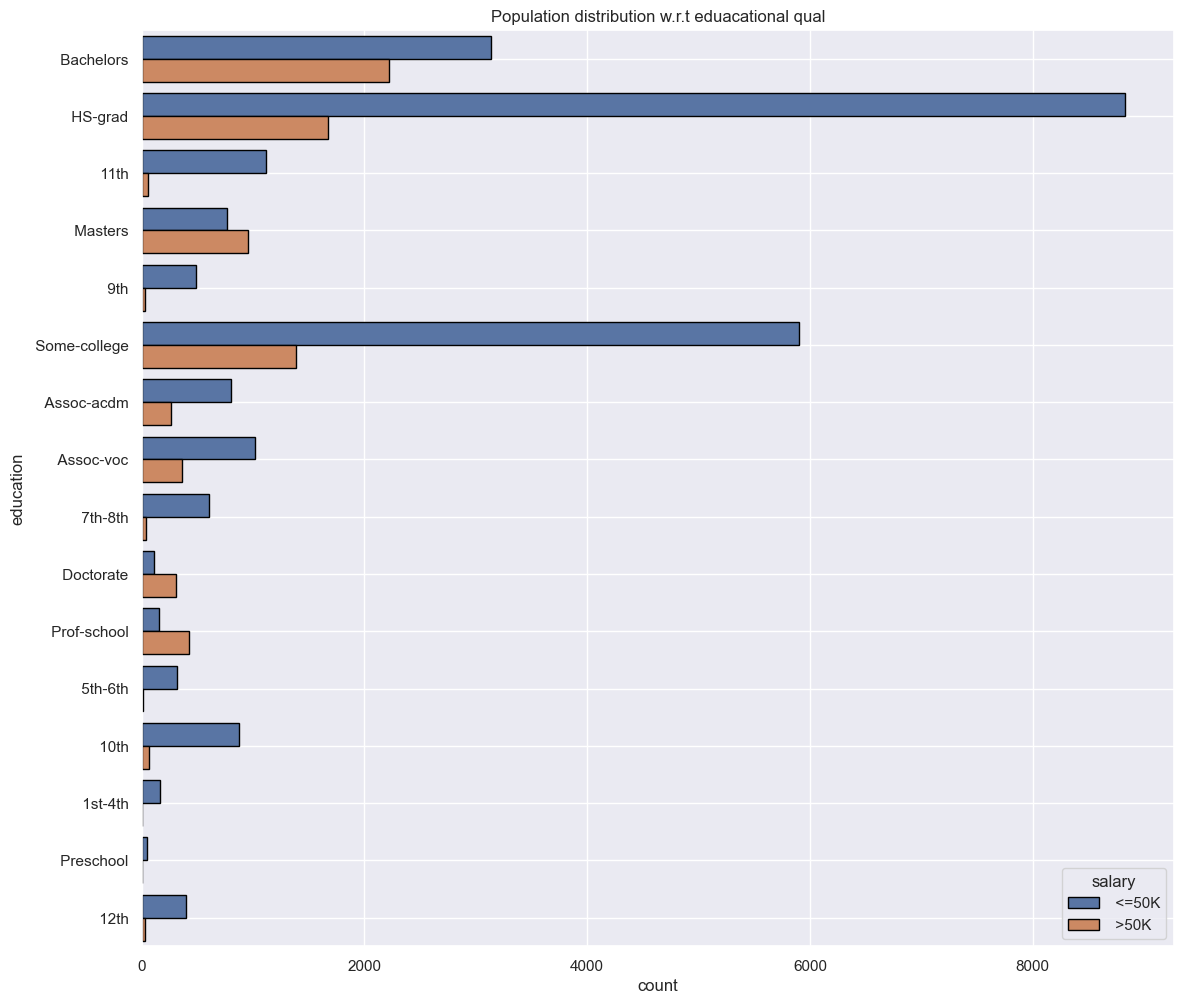

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,y='education',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Population distribution w.r.t eduacational qual')
plt.grid(True)
plt.show()

We can club the datapoints of pre-school to class 12th into one category like- 'Others' for reducing the number of unique features and also because each of them have less datapoints related to them

In [16]:
def replace_val(education):
    Other_categ=[' 11th',' 9th', ' 7th-8th',' 5th-6th',' 10th', ' 1st-4th', ' Preschool',' 12th']
    if education in Other_categ:
        return 'Other'
    else:
        return education

df['education']=df['education'].apply(replace_val)
print(df['education'].unique())

[' Bachelors' ' HS-grad' 'Other' ' Masters' ' Some-college' ' Assoc-acdm'
 ' Assoc-voc' ' Doctorate' ' Prof-school']


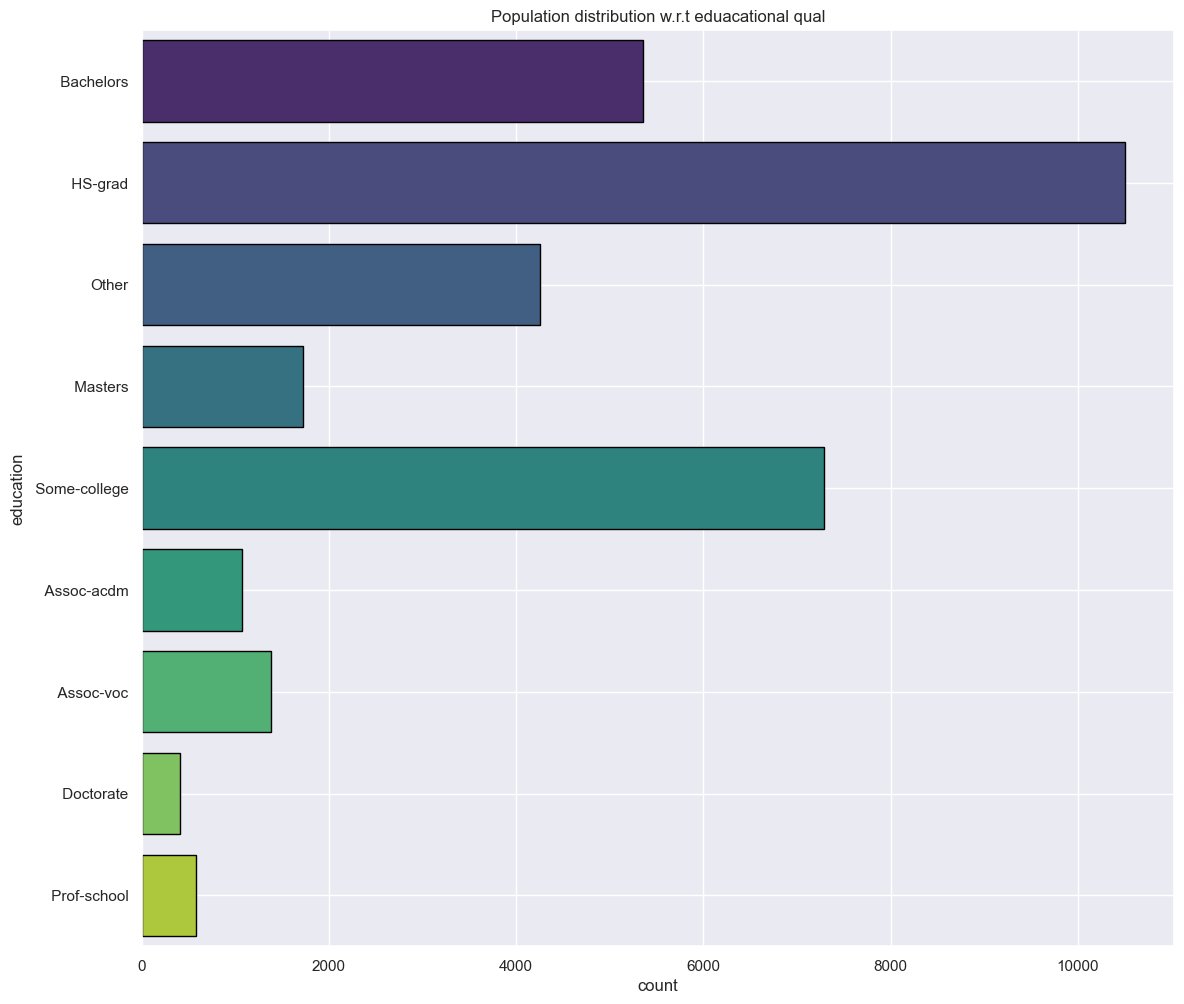

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,y='education',palette='viridis',edgecolor='black')
plt.tight_layout()
plt.title('Population distribution w.r.t eduacational qual')
plt.grid(True)
plt.show()

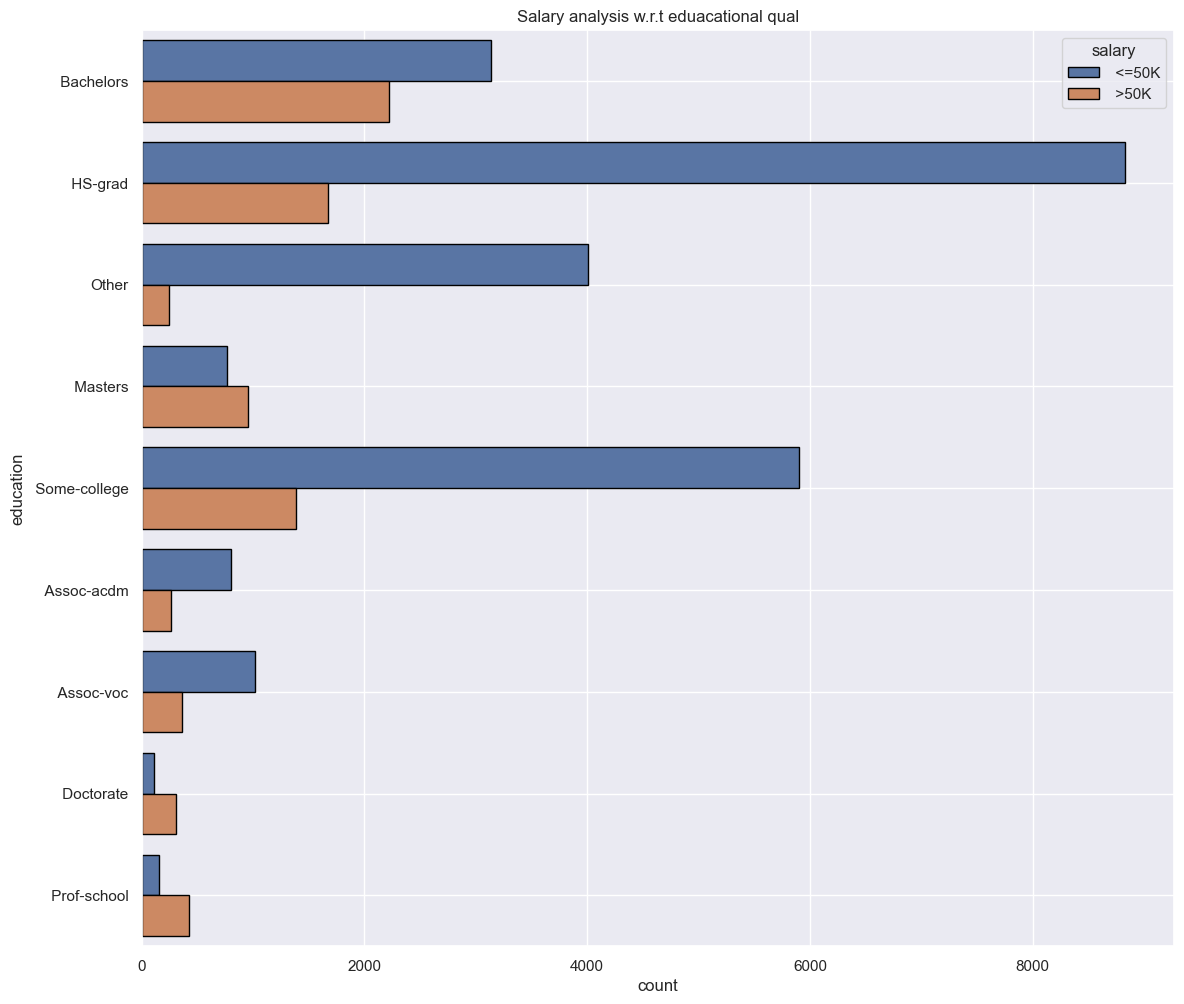

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,y='education',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary analysis w.r.t eduacational qual')
plt.grid(True)
plt.show()

#### Insights::
Most of the people have High school education very few have a Doctorate or Prof-school. Higher educational qualification corresponds to higher salaries therefore there is higher frequency of people earning more than 50K in the categories of Doctorate, Prof-school and Masters.

In [19]:
df['education-num'].unique()  ## numeric representation

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

## Feature 'marital-status'

In [20]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [21]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

Here we have so many categories under marital-status therefore we'll convert these into just two categories, married and unmarried

In [22]:
def mar_status(status):
    unmarried=[' Never-married',' Divorced',' Separated',
       ' Widowed']
    if status in unmarried:
        return 'unmarried'
    else :
        return 'married'
    
df['marital-status']=df['marital-status'].apply(mar_status)
print(df['marital-status'].unique())

['unmarried' 'married']


In [23]:
df['marital-status'].value_counts()

unmarried    17144
married      15417
Name: marital-status, dtype: int64

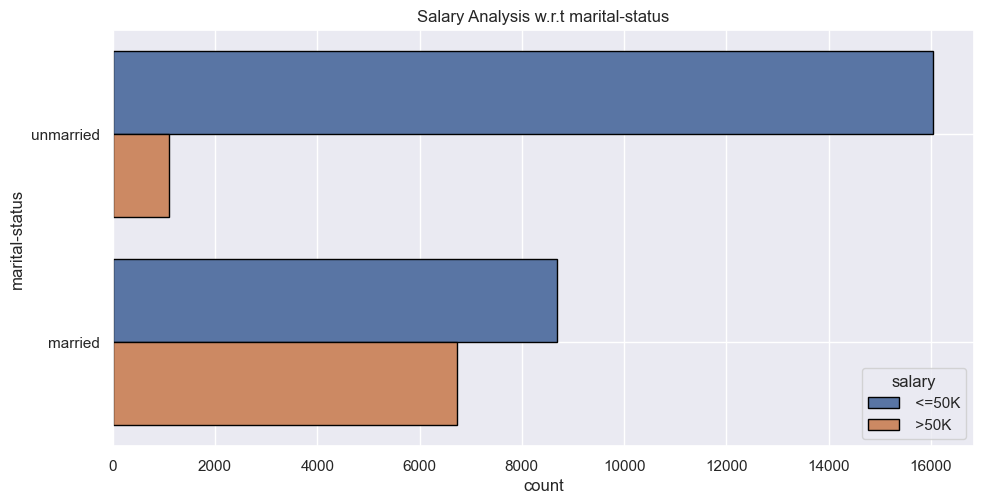

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='marital-status',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary Analysis w.r.t marital-status')
plt.grid(True)
plt.show()

#### Insights::
From the above graph we can observe that married category has a higher proportion of population earning more than 50K 

###  Feature 'occupation'

In [26]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

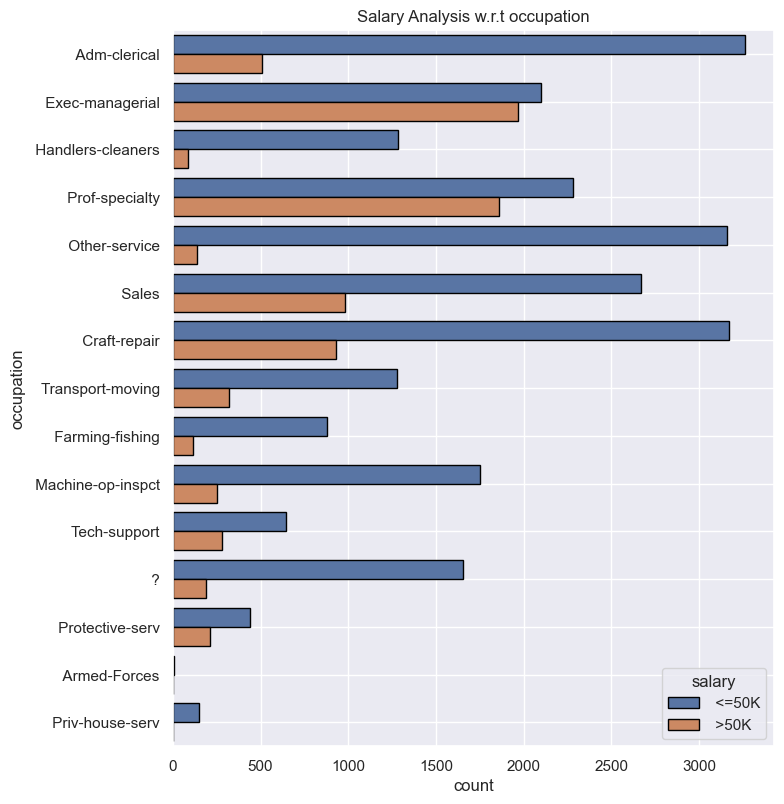

In [42]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,y='occupation',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary Analysis w.r.t occupation')
plt.grid(True)
plt.show()

#### Insights ::
from the above graph we can observe that people working in Prof-Speciality, Exec-managerial have the highest proportion of people earning more than 50k and farming-fishing, handlers-cleaners have the lowest proportion of people earning more than 50K , excuding the data of the armed forces and Priv-house-serv

There is also an occupation labelled as '?' which has to be handled.

### Feature 'Relationship'

In [39]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [40]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

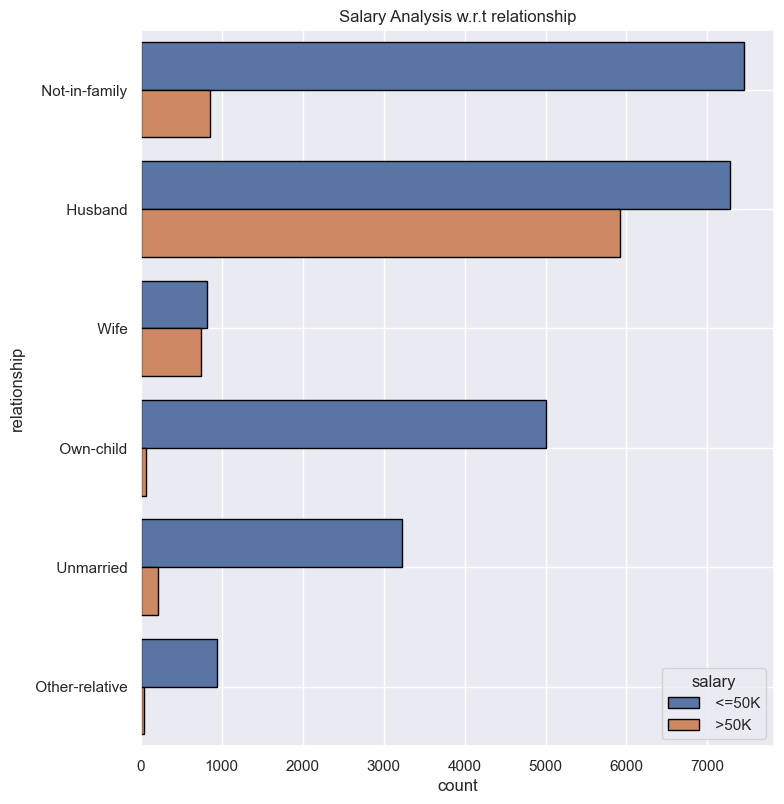

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,y='relationship',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary Analysis w.r.t relationship')
plt.grid(True)
plt.show()

#### Insights::
Majority of people earning more than 50K fall under the husband category of the relationship

## Feature 'race'

In [44]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [45]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

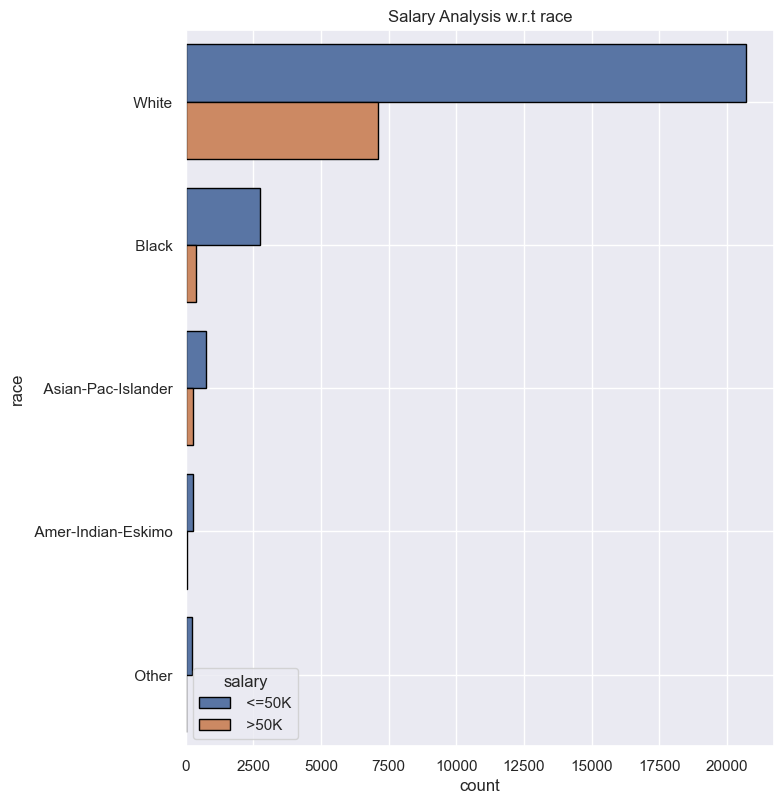

In [46]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,y='race',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary Analysis w.r.t race')
plt.grid(True)
plt.show()

#### Insights::
According to the data provided the percentage or proportion of people earning more than 50K is high for white people and Asian-Pac-Islanders.
But there is disproportionate data present here. The number of entries for White people is 27816 with the second most prevalent race being the blacks with only 3124 entries.

### Feature 'sex'

In [47]:
df['sex'].unique()


array([' Male', ' Female'], dtype=object)

In [48]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

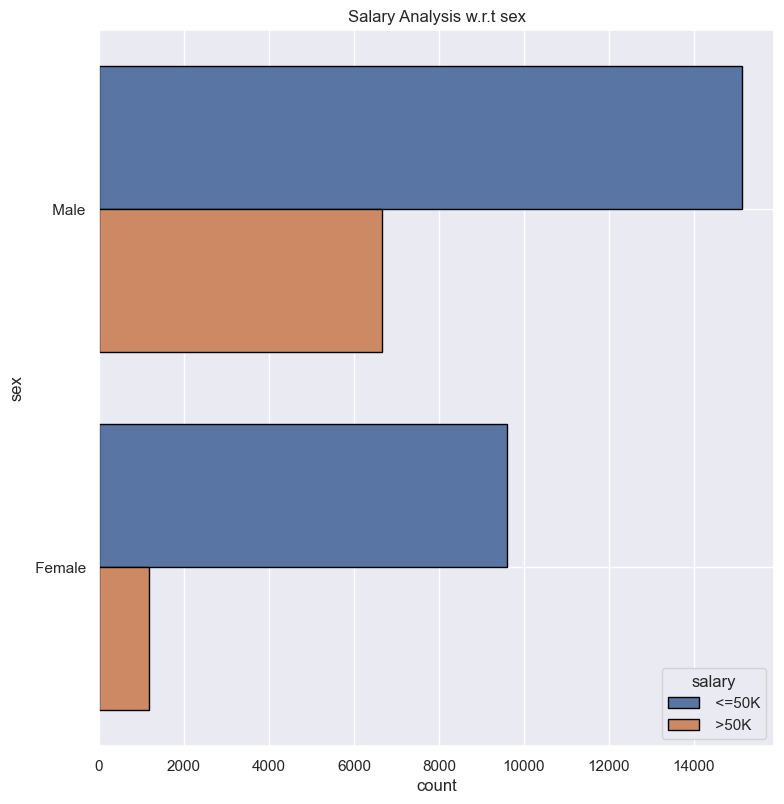

In [49]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,y='sex',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary Analysis w.r.t sex')
plt.grid(True)
plt.show()

#### Insights ::
From the graph we can see that there is a higher proportion of males earning more than 50K 

## Feature 'capital-gain'

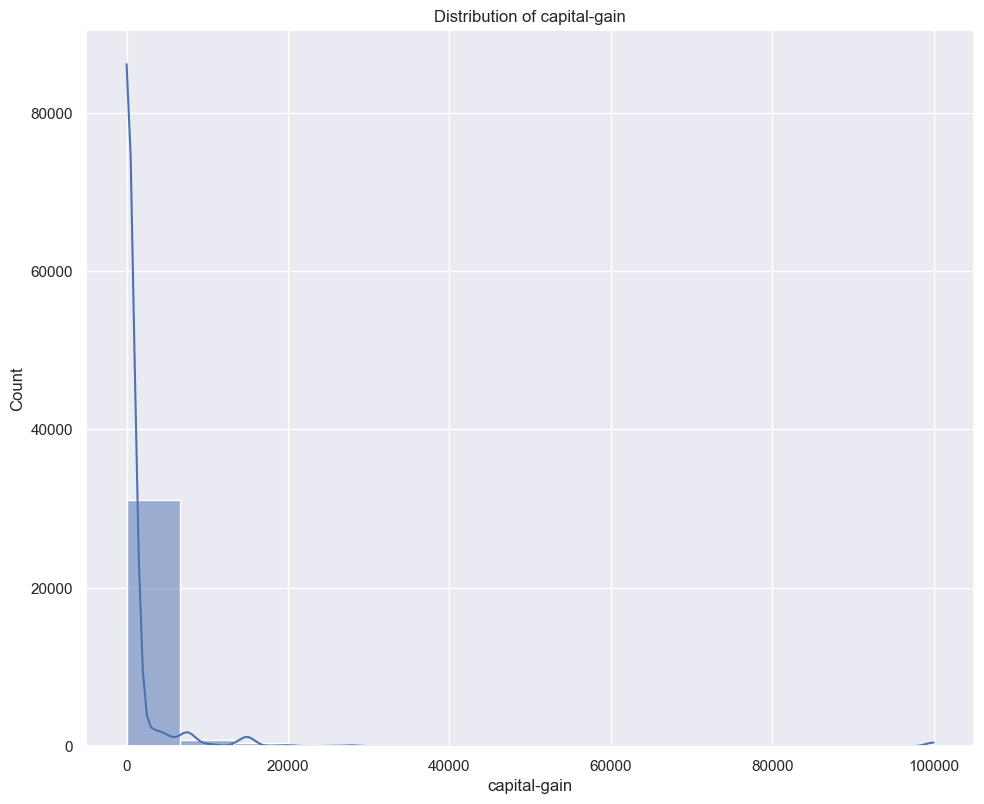

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['capital-gain'],kde=True,bins=15)
plt.tight_layout()
plt.title('Distribution of capital-gain')
plt.grid(True)
plt.show()

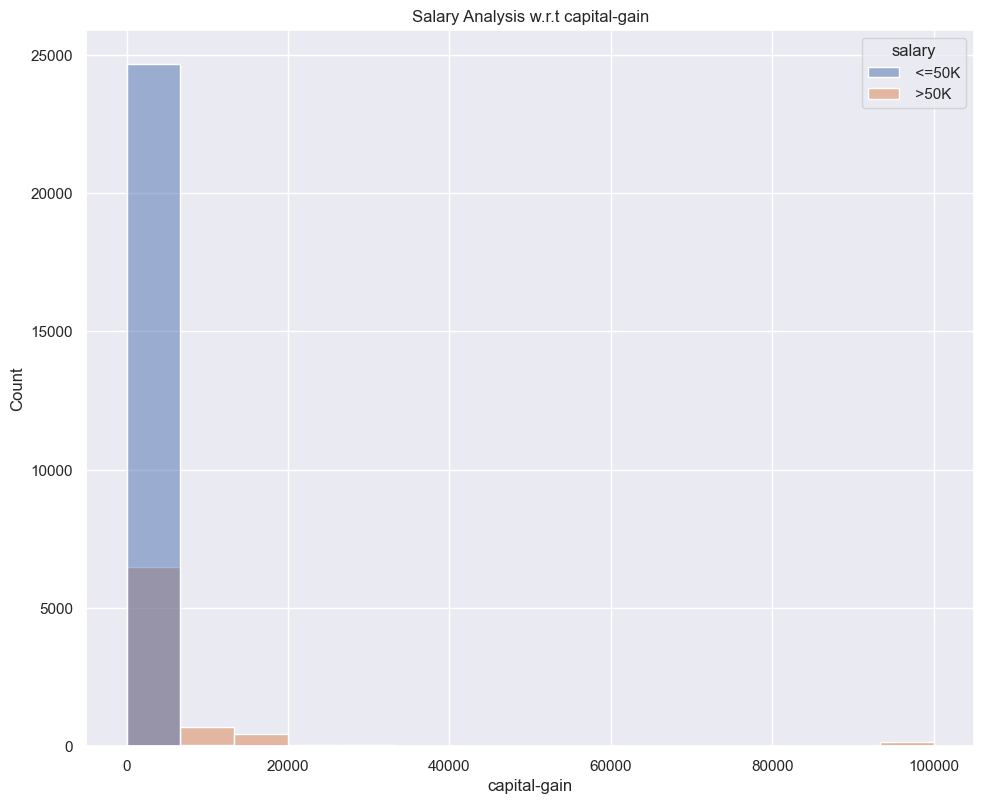

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['capital-gain'],hue=df['salary'],bins=15)
plt.tight_layout()
plt.title('Salary Analysis w.r.t capital-gain')
plt.grid(True)
plt.show()

#### Insights ::
The distribution of capital-gain is skewed and have 
outliers present

## Feature 'capital-loss'

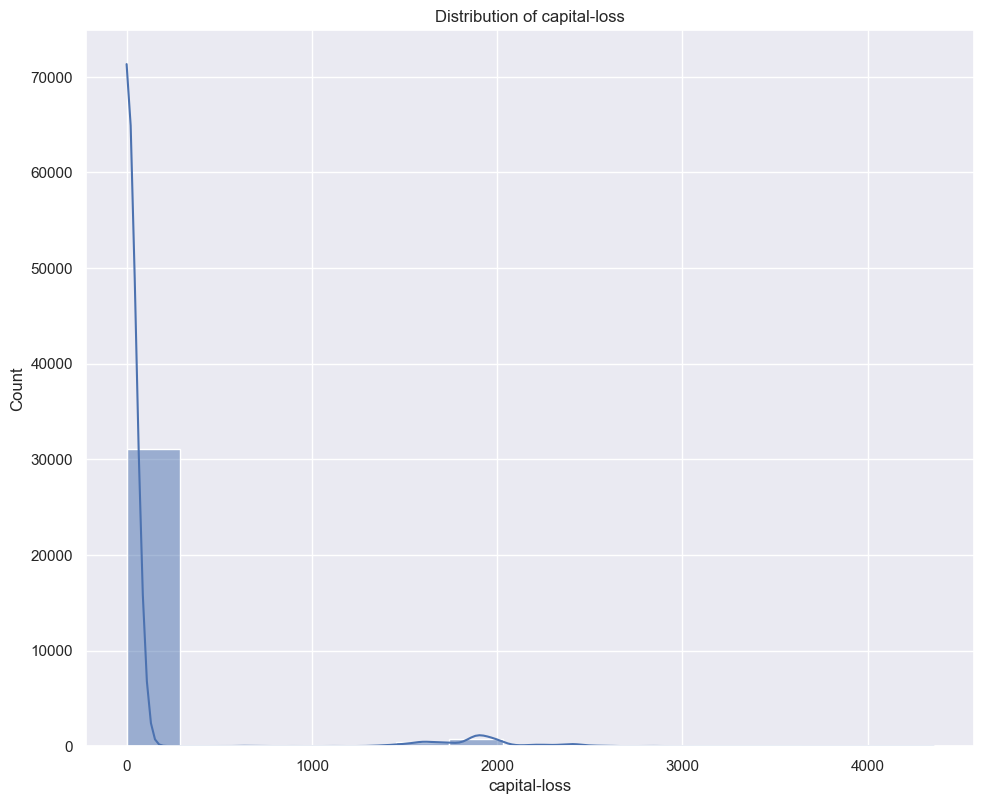

In [63]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['capital-loss'],kde=True,bins=15)
plt.tight_layout()
plt.title('Distribution of capital-loss')
plt.grid(True)
plt.show()

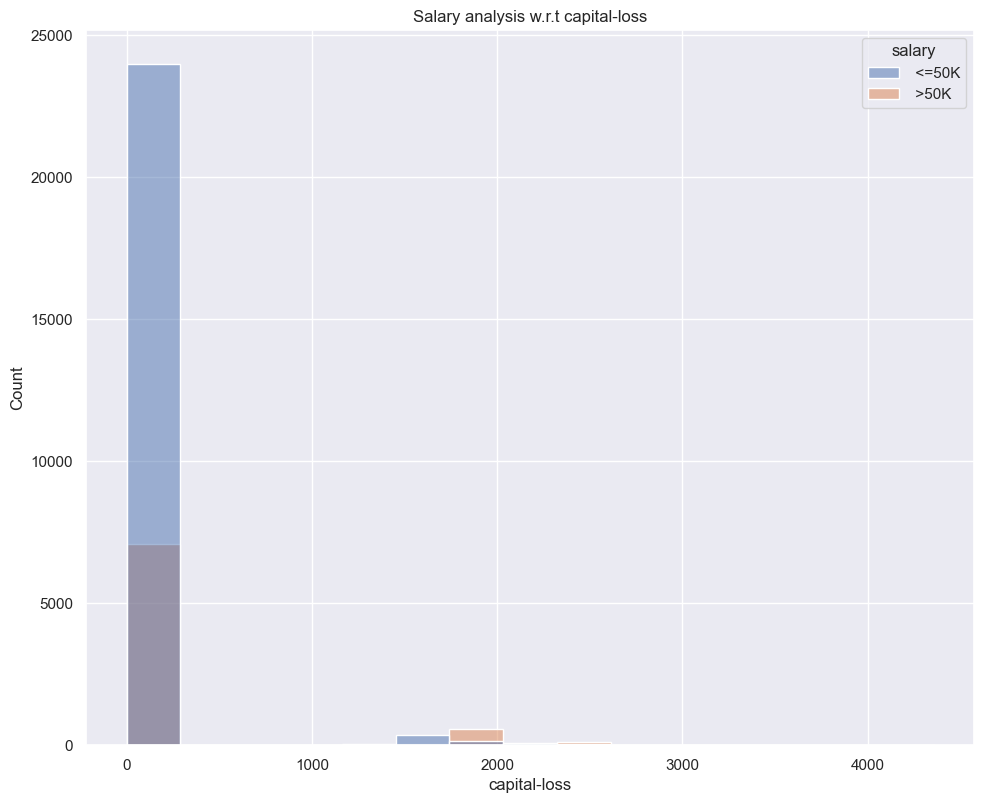

In [66]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['capital-loss'],hue=df['salary'],bins=15)
plt.tight_layout()
plt.title('Salary analysis w.r.t capital-loss')
plt.grid(True)
plt.show()

#### Insights ::

The data is quite unsymmetric in nature.

## Feature 'hours-per-week'

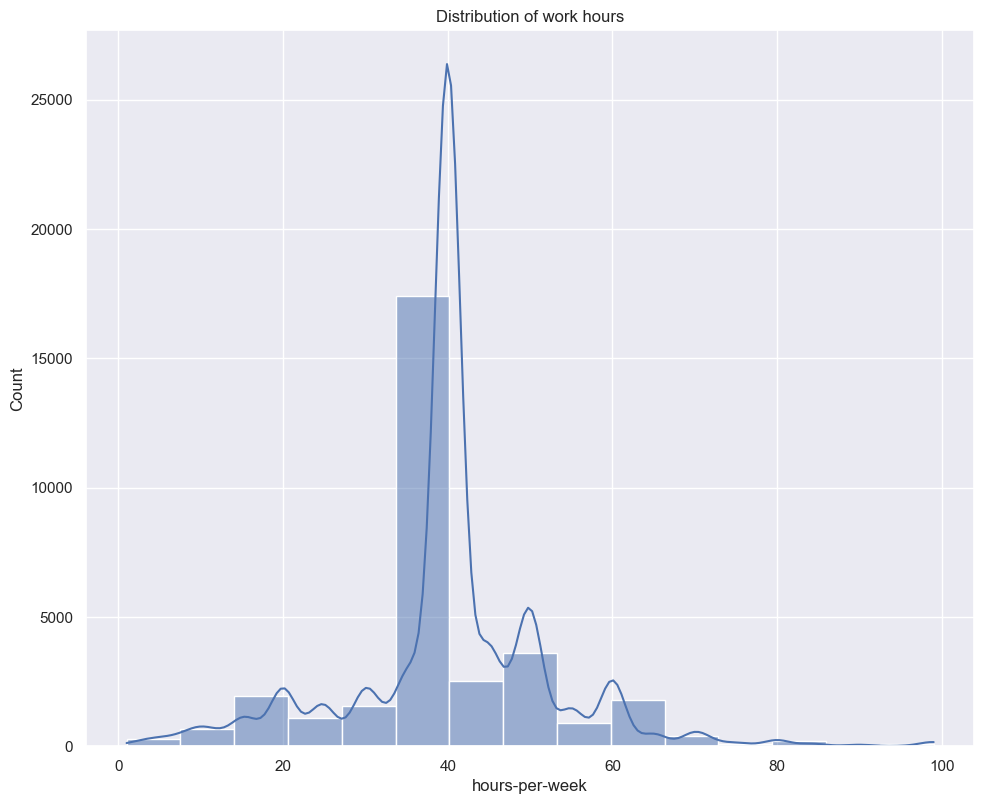

In [68]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['hours-per-week'],kde=True,bins=15)
plt.tight_layout()
plt.title('Distribution of work hours')
plt.grid(True)
plt.show()

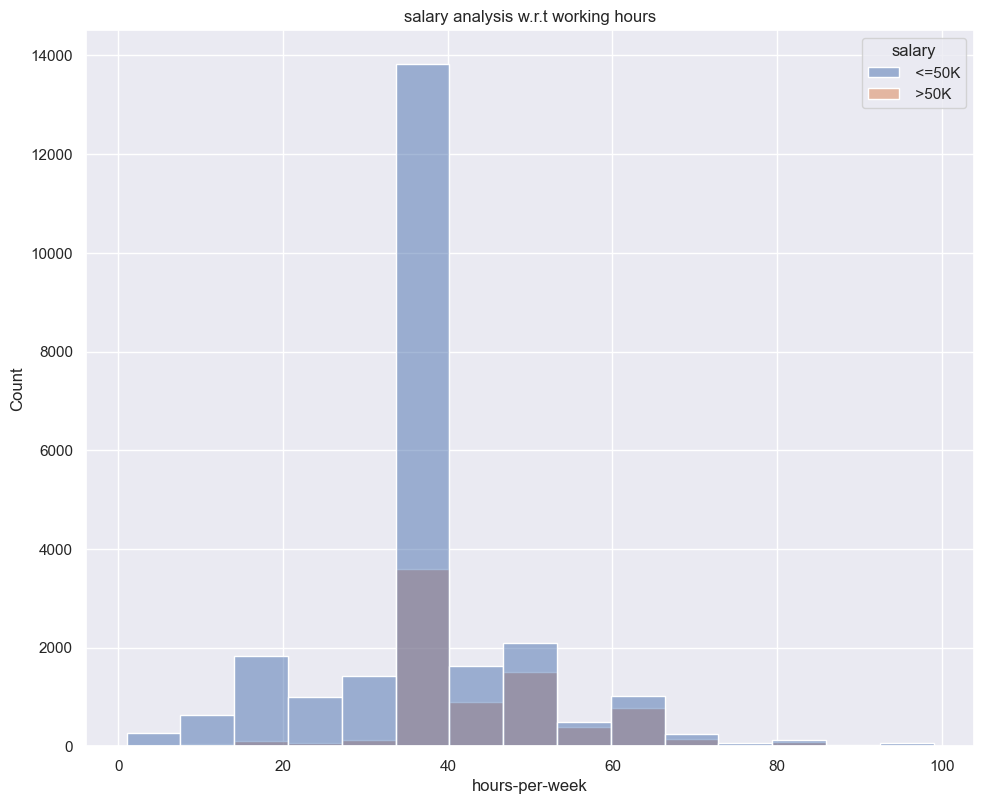

In [69]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['hours-per-week'],hue=df['salary'],bins=15)
plt.tight_layout()
plt.title('salary analysis w.r.t working hours')
plt.grid(True)
plt.show()

#### Insights::
Here we can observe that the distribution is centred about 40 hrs of work , maximum datapoints for hrs=40. 

## feature 'country'


In [70]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [71]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

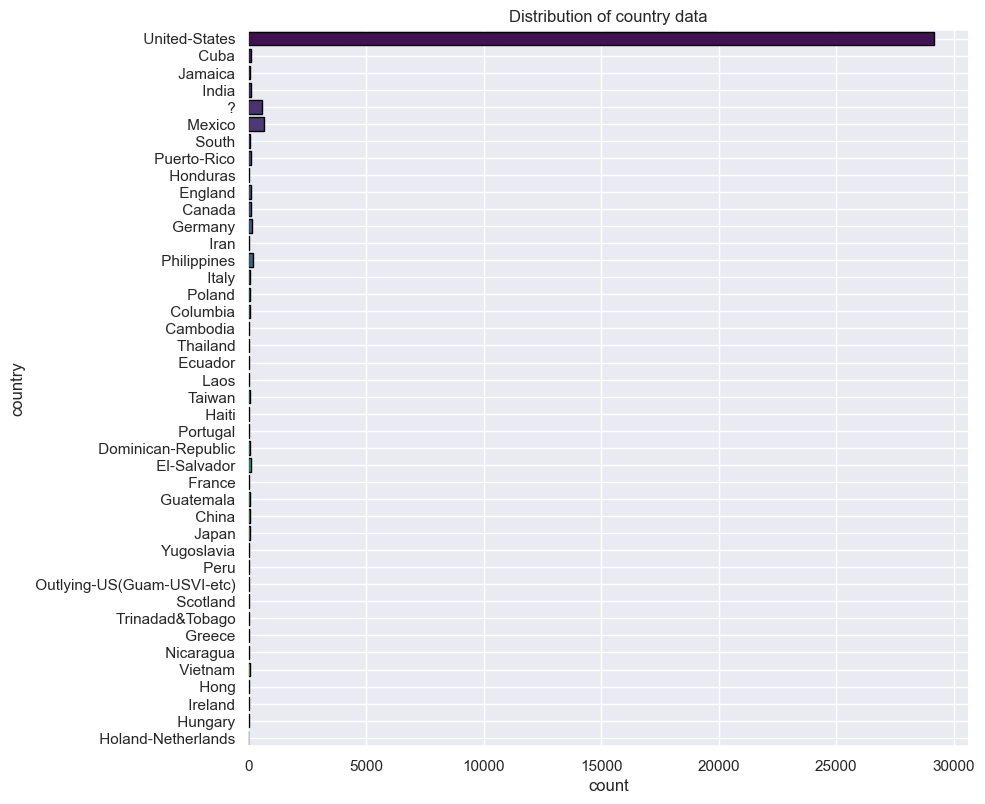

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='country',palette='viridis',edgecolor='black')
plt.tight_layout()
plt.title('Distribution of country data')
plt.grid(True)
plt.show()

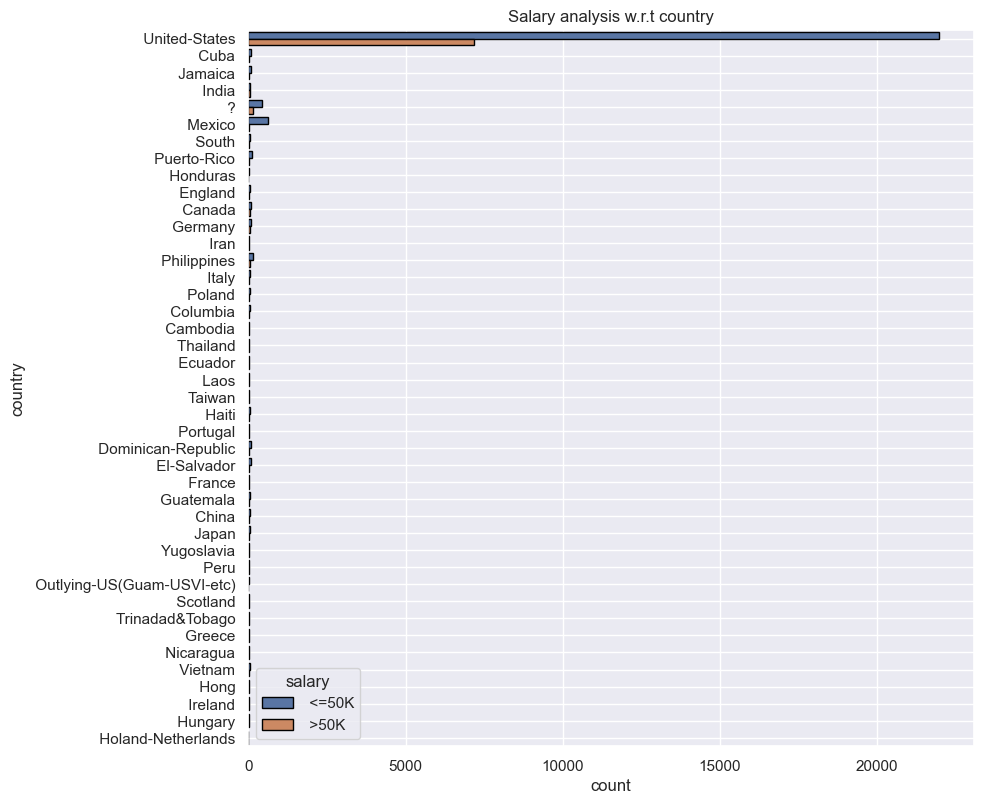

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='country',hue='salary',edgecolor='black')
plt.tight_layout()
plt.title('Salary analysis w.r.t country')
plt.grid(True)
plt.show()

#### Insights ::
The distribution of the data in the country column does'nt give any meaningful information .

# Feature Engineering

We will drop features such as country, relationship, race, education-num